# Clustering

Clustering is a technique for detecting distinct subgroups or clusters in data. The algorithm looks for instances centered around a point called a centroid and assigns (labels or indexes) each instance to a cluster based on its closeness to the centroid. 

Clustering is an unsupervised machine learning method. The labelling should not be confused with labelled data in predictive modelling.

There are many variations of clustering algorithms such as **K-Means Clustering, Hierarchical Clustering, Affinity Propagation and DBSCAN (among others)** 

Clustering can be applied for customer segmentation, anomaly detection, dimensionality reduction, image segmentation


# K means Clustering

K-Means Clustering partitions data into K non-overlapping clusters. The model needs to be configured with a the desired number of clusteres $K$. The model then assigns each data point to one of the K clusters such that **the total within cluster-variation for each data point is minimized**

This within-cluster variation is calculated using a distance based metric such as the Euclidean Distance. We can then calculate and mimimize **the sum of pairwise euclidean distances in the Kth cluster divided by the total number of observations in the Kth cluster.**  

- **Centroid Initialization**

Selecting K and deciding where to put the centroids is not a straightforward task and depends upon the domain and the dataset. The algorithm typically initializes the centroids randomly and the model iterates multiple times until a good solution is achieved by minimizing the within-cluster variation discussed above. An alternative centroid initialization step is K-means++ which selects centroids that are distant from one another. 

- **Selecting K**

Increasing K tends to reduce within cluster variation. The more clusters there are the closer each datapoint will be to its closest centroid. The Elbow method and the silhouette score ranging from -1 to 1. 



# 1. Import Libraries and Data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [2]:
# Importing the dataset
df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 2. Optimize K

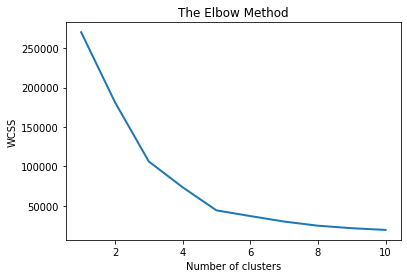

In [4]:
# The Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, linewidth = 2, alpha = 1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 3. Train and Visualize 

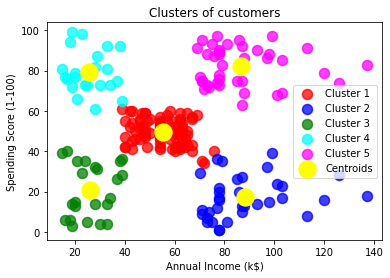

Silhouette Score: 0.553931997444648


In [5]:
# Deplying the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1',linewidth = 1.5, alpha = 0.75)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2',linewidth = 1.5, alpha = 0.75)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3',linewidth = 1.5, alpha = 0.75)
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4',linewidth = 1.5, alpha = 0.75)
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5',linewidth = 1.5, alpha = 0.75)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# silhouette score
print(f"Silhouette Score: {silhouette_score(X, kmeans.labels_)}")

# Minibatch K-Means


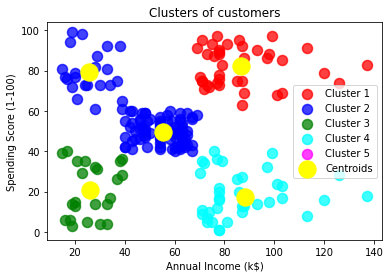

In [6]:
# Deploy minibatch k means
minibatch = MiniBatchKMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = minibatch.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1',linewidth = 1.5, alpha = 0.75)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2',linewidth = 1.5, alpha = 0.75)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3',linewidth = 1.5, alpha = 0.75)
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4',linewidth = 1.5, alpha = 0.75)
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5',linewidth = 1.5, alpha = 0.75)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierachical Clustering

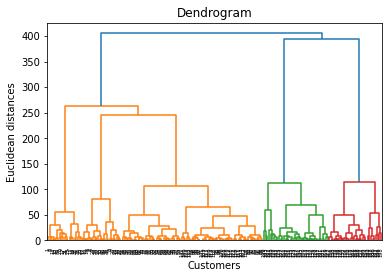

In [7]:
# Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()